In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
df=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [31]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [32]:
df.drop(['society','location','availability','total_sqft'],axis=1,inplace=True)

In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12711 non-null  object 
 1   size       12711 non-null  object 
 2   bath       12711 non-null  float64
 3   balcony    12711 non-null  float64
 4   price      12711 non-null  float64
dtypes: float64(3), object(2)
memory usage: 595.8+ KB


In [41]:
df.replace(to_replace=['Built-up  Area','1 Bedroom'],value=0,inplace=True)
df.replace(to_replace=['Carpet  Area','1 BHK'],value=1,inplace=True)
df.replace(to_replace=['Plot  Area','1 RK'],value=2,inplace=True)
df.replace(to_replace=['Super built-up  Area','10 Bedroom'],value=3,inplace=True)
df.replace(to_replace=['1 BHK'],value=4,inplace=True)
df.replace(to_replace=['11 Bedroom'],value=5,inplace=True)
df.replace(to_replace=['11 BHK'],value=6,inplace=True)
df.replace(to_replace=['12 Bedroom'],value=7,inplace=True)
df.replace(to_replace=['13 BHK'],value=8,inplace=True)
df.replace(to_replace=['14 BHK'],value=9,inplace=True)
df.replace(to_replace=['16 BHK'],value=10,inplace=True)
df.replace(to_replace=['18 Bedroom'],value=11,inplace=True)
df.replace(to_replace=['19 BHK'],value=12,inplace=True)
df.replace(to_replace=['2 Bedroom'],value=13,inplace=True)
df.replace(to_replace=['2 BHK'],value=14,inplace=True)
df.replace(to_replace=['27 BHK'],value=15,inplace=True)
df.replace(to_replace=['3 Bedroom'],value=16,inplace=True)
df.replace(to_replace=['3 BHK'],value=17,inplace=True)
df.replace(to_replace=['4 Bedroom'],value=18,inplace=True)
df.replace(to_replace=['4 BHK'],value=19,inplace=True)
df.replace(to_replace=['43 Bedroom'],value=20,inplace=True)
df.replace(to_replace=['5 Bedroom'],value=21,inplace=True)
df.replace(to_replace=['5 BHK'],value=22,inplace=True)
df.replace(to_replace=['6 Bedroom'],value=23,inplace=True)
df.replace(to_replace=['6 BHK'],value=24,inplace=True)
df.replace(to_replace=['7 Bedroom'],value=25,inplace=True)
df.replace(to_replace=['7 BHK'],value=26,inplace=True)
df.replace(to_replace=['8 Bedroom'],value=27,inplace=True)
df.replace(to_replace=['8 BHK'],value=28,inplace=True)
df.replace(to_replace=['9 Bedroom'],value=29,inplace=True)
df.replace(to_replace=['9 BHK'],value=30,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12711 non-null  int64  
 1   size       12711 non-null  int64  
 2   bath       12711 non-null  float64
 3   balcony    12711 non-null  float64
 4   price      12711 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 595.8 KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [44]:
test.drop(['society','availability','location','total_sqft','price'],axis=1,inplace=True)

In [48]:
test.replace(to_replace=['Built-up  Area','1 Bedroom'],value=0,inplace=True)
test.replace(to_replace=['Carpet  Area','1 BHK'],value=1,inplace=True)
test.replace(to_replace=['Plot  Area','1 RK'],value=2,inplace=True)
test.replace(to_replace=['Super built-up  Area','10 Bedroom'],value=3,inplace=True)
test.replace(to_replace=['1 BHK'],value=4,inplace=True)
test.replace(to_replace=['11 Bedroom'],value=5,inplace=True)
test.replace(to_replace=['11 BHK'],value=6,inplace=True)
test.replace(to_replace=['12 Bedroom'],value=7,inplace=True)
test.replace(to_replace=['13 BHK'],value=8,inplace=True)
test.replace(to_replace=['14 BHK'],value=9,inplace=True)
test.replace(to_replace=['16 BHK'],value=10,inplace=True)
test.replace(to_replace=['18 Bedroom'],value=11,inplace=True)
test.replace(to_replace=['19 BHK'],value=12,inplace=True)
test.replace(to_replace=['2 Bedroom'],value=13,inplace=True)
test.replace(to_replace=['2 BHK'],value=14,inplace=True)
test.replace(to_replace=['27 BHK'],value=15,inplace=True)
test.replace(to_replace=['3 Bedroom'],value=16,inplace=True)
test.replace(to_replace=['3 BHK'],value=17,inplace=True)
test.replace(to_replace=['4 Bedroom'],value=18,inplace=True)
test.replace(to_replace=['4 BHK'],value=19,inplace=True)
test.replace(to_replace=['43 Bedroom'],value=20,inplace=True)
test.replace(to_replace=['5 Bedroom'],value=21,inplace=True)
test.replace(to_replace=['5 BHK'],value=22,inplace=True)
test.replace(to_replace=['6 Bedroom'],value=23,inplace=True)
test.replace(to_replace=['6 BHK'],value=24,inplace=True)
test.replace(to_replace=['7 Bedroom'],value=25,inplace=True)
test.replace(to_replace=['7 BHK'],value=26,inplace=True)
test.replace(to_replace=['8 Bedroom'],value=27,inplace=True)
test.replace(to_replace=['8 BHK'],value=28,inplace=True)
test.replace(to_replace=['9 Bedroom'],value=29,inplace=True)
test.replace(to_replace=['9 BHK'],value=30,inplace=True)
test.replace(to_replace=['16 Bedroom'],value=31,inplace=True)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  1480 non-null   int64  
 1   size       1478 non-null   float64
 2   bath       1473 non-null   float64
 3   balcony    1411 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 46.4 KB


In [50]:
test['size'].mode()

0    14.0
dtype: float64

In [51]:
test['bath'].mode()

0    2.0
dtype: float64

In [52]:
test['balcony'].mode()

0    1.0
dtype: float64

In [53]:
test['size'].replace(np.nan,14,inplace=True)
test['bath'].replace(np.nan,2,inplace=True)
test['balcony'].replace(np.nan,1,inplace=True)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  1480 non-null   int64  
 1   size       1480 non-null   float64
 2   bath       1480 non-null   float64
 3   balcony    1480 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 46.4 KB


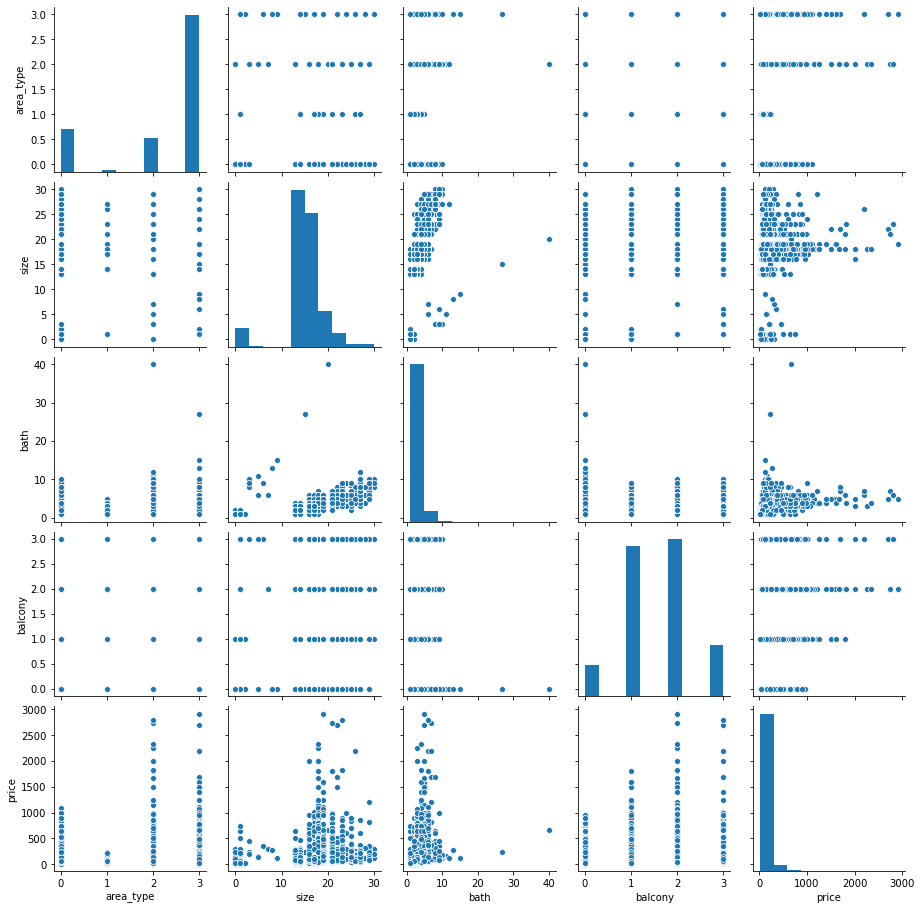

In [55]:
sns.pairplot(df)

In [56]:
X=df.drop(['price'], axis=1).values
y=df['price'].values

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [59]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
print(f"Multiple Linear Regression coeff: {regressor.coef_}")
print(f"Multiple Linear Regression Constant: {regressor.intercept_}")

Multiple Linear Regression coeff: [-2.94456465  0.83387145 44.29823473  4.9565362 ]
Multiple Linear Regression Constant: -24.107004828280864


In [61]:
y_predict=regressor.predict(X_test)

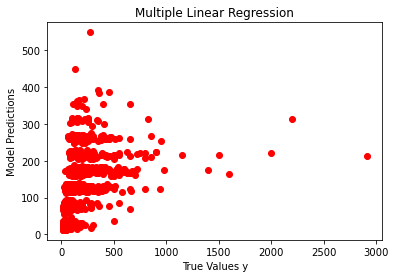

In [62]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [63]:
n=len(X_test)
n

3178

In [64]:
k=X_test.shape[1]
k

4

In [65]:
r2=r2_score(y_test, y_predict)
r2

0.23978205659467988

In [66]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.23882369801490644

In [67]:
# Ridge 
regressor_ridge=Ridge(alpha=50)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [68]:
print(f'Coeff:{regressor_ridge.coef_}')
print(f'Constant:{regressor_ridge.intercept_}')

Coeff:[-2.94957482  0.8873864  44.03695426  4.91687695]
Constant:-24.16580735731121


In [69]:
y_predict=regressor_ridge.predict(X_test)

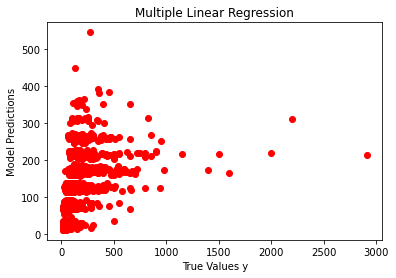

In [70]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [71]:
r2=r2_score(y_test, y_predict)
r2

0.23946270504277734

In [72]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.23850394387674234

In [73]:
# Lasso
regressor_lasso=Lasso(alpha=500)
regressor_lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [74]:
print(f'Coeff:{regressor_lasso.coef_}')
print(f'Constant:{regressor_lasso.intercept_}')

Coeff:[-0.  0.  0.  0.]
Constant:105.74203293821462


In [75]:
y_predict=regressor_lasso.predict(X_test)

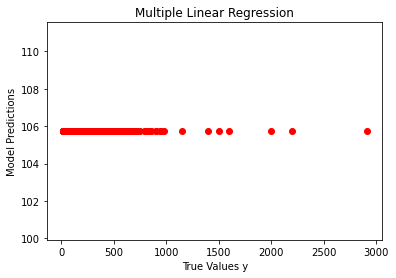

In [76]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [77]:
r2=r2_score(y_test, y_predict)
r2

-8.911049418047767e-05

In [78]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

-0.0013498594516268003

In [79]:
y_predict=regressor.predict(test)

In [80]:
y_predict.shape

(1480,)

In [82]:
y_predict

array([ 77.24304335, 402.7833228 , 216.41779797, ...,  77.24304335,
        81.12020109,  86.0767373 ])

In [83]:
predict=pd.DataFrame(data=y_predict)

In [84]:
predict.head()

,0
0,77.243043
1,402.783323
2,216.417798
3,119.086356
4,72.286507


In [85]:
predict.to_csv('solution.csv',index=False)